### Цель работы:
Изучение алгоритмов и методов регрессии на практике.
### **Вариант 2**


### Импорт основных библиотек и загрузка данных

In [493]:
# Импорт основных библиотек для анализа данных и визуализации и чтение файла
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df_var2 = pd.read_excel('regression.xlsx', sheet_name=1)

### **Часть 1 - Простая линейная регрессия**

Обучить модель простой (парной) линейной регрессии, используя для обучения значения ```x1``` и ```y```, а затем ```x2``` и ```y```.

**1.1 В данном фрагменте кода последовательно строятся две модели простой линейной регрессии.**

Для обучения моделей были выполнены следующие шаги:
1) Из исходного набора данных были выделены независимые переменные ```x1``` и ```x2``` (признаки), а также зависимая переменная ```y``` (цель моделирования).
2) Для каждого признака (```x1``` и ```x2```) была создана отдельная модель линейной регрессии ```LinearRegression()```.
3) Каждая модель была обучена на своих данных с использованием метода ```.fit()```, что позволило определить коэффициенты и получить уравнение линейной зависимости между соответствующим признаком и целевой переменной ```y```.

In [494]:
# Подготовка данных для первой модели
x1 = df_var2[['x1']]
y = df_var2['y']

# Создание и обучение первой модели 
model_x1 = LinearRegression()
model_x1.fit(x1, y)

# Подготовка данных для второй модели
x2 = df_var2[['x2']]

# Создание и обучение второй модели
model_x2 = LinearRegression()
model_x2.fit(x2, y)

LinearRegression()

**1.2 Далее была использована обученная модель, чтобы получить предсказания целевой переменной (необходимо для оценки точности моделей).**

```model_x1.predict(x1)``` - модель, обученная на признаке ```x1```, вычисляет прогнозируемые значения ```y``` для тех же входных данных ```x1```. Результат сохраняется в переменной ```y_pred_x1```.

```model_x2.predict(x2)``` - аналогично, вторая модель, обученная на признаке ```x2```, генерирует предсказанные значения ```y``` на основе входных значений ```x2```. Результат сохраняется в переменной ```y_pred_x2```.

In [495]:
# Выполнение предсказания для обеих моделей
y_pred_x1 = model_x1.predict(x1)
y_pred_x2 = model_x2.predict(x2)

**1.3 Была сформирована таблица с результатами предсказаний моделей.**

Где:
- ```Actual``` - фактические значения целевой переменной ```y```;
- ```Predicted_x1``` - значения, предсказанные первой моделью (построенной по признаку ```x1```);
- ```Predicted_x2``` — значения, предсказанные второй моделью (по признаку ```x2```).

In [496]:
# Создание DataFrame с результатми предсказаний
df_results = pd.DataFrame({
    'Actual': y,
    'Predicted_x1': y_pred_x1,
    'Predicted_x2': y_pred_x2})

display(df_results.head())
display(df_results.tail())

Actual  Predicted_x1  Predicted_x2
0  2.320641      0.839560      1.307453
1 -1.001832     -1.919443      1.531017
2 -2.773939     -1.122424     -1.814515
3 -1.511325     -1.941897      1.847776
4  2.852593      2.026295     -0.658625

Actual  Predicted_x1  Predicted_x2
995 -1.087390     -1.846711      0.735622
996 -2.475857     -0.115286     -1.950409
997  2.644737      1.639784      0.347326
998  2.114322     -0.417403      1.743242
999 -1.217945      0.934002     -1.207024

Данные результаты показывают, что
1. Ни одна из моделей не предсказывает значения идеально, то есть предсказания как по признаку ```x1```, так и по ```x2``` заметно отличаются от фактических значений ```Actual```.
2. В некоторых случаях модель на ```x1``` ближе к фактическому значению, например, строка 2: обе модели ошибаются, но модель ```x2``` ближе (```Actual = –2.77, Predicted_x1 = –1.12, Predicted_x2 = –1.81```).
3. В других случаях модель на ```x2``` предсказывает хуже, чем модель на ```x1```, например, строка 1: модель ```x2``` предсказывает значение противоположного знака - это сильная ошибка (```Actual = –1.00, Predicted_x1 = –1.92, Predicted_x2 = 1.53```).
4. Есть строка, где обе модели дают прогноз, отличающийся от фактического, и даже с противоположным знаком, например, строка 4, где ```Actual = 2.85```, ```Predicted_x1 = 2.03``` - ближе, ```Predicted_x2 = –0.66``` - совсем не соответствует фактическому значению.
5. Признаки ```x1``` и ```x2``` по-разному объясняют зависимость. Модели реагируют на данные иначе, поэтому предсказания могут сильно отличаться друг от друга.

**1.4 Были подсчитаны и выведены в консоль метрики качества регрессии (MSE, MAE, RMSE, R2) для каждой модели.**

In [497]:
# Метрики для первой модели (по признаку x1)
mse_x1 = mean_squared_error(y, y_pred_x1)
mae_x1 = mean_absolute_error(y, y_pred_x1)
rmse_x1 = np.sqrt(mse_x1)
r2_x1 = r2_score(y, y_pred_x1)

# Метрики для второй модели (по признаку x2)
mse_x2 = mean_squared_error(y, y_pred_x2)
mae_x2 = mean_absolute_error(y, y_pred_x2)
rmse_x2 = np.sqrt(mse_x2)
r2_x2 = r2_score(y, y_pred_x2)

print("Метрики модели по x1")
print("MSE:", round(mse_x1, 5))
print("MAE:", round(mae_x1, 5))
print("RMSE:", round(rmse_x1, 5))
print("R2:", round(r2_x1, 5))

print("\nМетрики модели по x2")
print("MSE:", round(mse_x2, 5))
print("MAE:", round(mae_x2, 5))
print("RMSE:", round(rmse_x2, 5))
print("R2:", round(r2_x2, 5))

Метрики модели по x1
MSE: 1.89571
MAE: 1.14894
RMSE: 1.37685
R2: 0.42827

Метрики модели по x2
MSE: 2.09033
MAE: 1.10044
RMSE: 1.4458
R2: 0.36957


**MSE (Mean Squared Error)** - среднеквадратичная ошибка - показывает, насколько в среднем модель ошибается. Чем меньше MSE - тем лучше модель.\
**MAE (Mean Absolute Error)** - средняя абсолютная ошибка - это «средняя ошибка» в тех же единицах, что и целевая переменная. Чем меньше, тем лучше.\
**RMSE (Root Mean Squared Error)** - корень из MSE - тоже показывает ошибку, но учитывает сильные отклонения. Показатель в том же масштабе, что и целевая переменная (как MAE). Чем меньше - тем лучше.\
**R2 (коэффициент детерминации)** - показывает, насколько хорошо модель объясняет данные. 1 = идеальная модель, 0 = модель никак не помогает. Чем ближе к 1 - тем лучше.

Результаты:
- MSE: у модели 1 - 1.89571, у модели 2 - 2.09033. Модель 1 ошибается меньше, чем по модель 2.
- MAE: у модели 1 - 1.14894, у модели 2 - 1.10044. В среднем, предсказание модели 2 отклоняется от истинного значения, чуть меньше чем модель 1.
- RMSE: у модели 1 - 1.37685, у модели 2 - 1.44580. Это квадратный корень из MSE. У модели 1 редкие большие ошибки существуют, но не критично, а у модели 2 больше крупных ошибок, чем у первой.
- R2 модели 1: 0.42827. Это значение ближе к 0, чем к 1, поэтому модель объясняет только 42.83% изменчивости переменной ```y```. Такой результат говорит о том, что связь между ```x1``` и ```y``` существует, но не является сильной. Модель улавливает часть зависимости, но большая доля вариации остаётся необъяснённой - возможно, на ```y``` влияют другие признаки.
- R2 модели 2: 0.36957. Модель объясняет 36.96% изменчивости ```y```, что хуже, чем у модели по ```x1```. Это тоже невысокий результат, указывающий на слабую линейную связь между ```x2``` и ```y```. Модель не способна точно предсказывать значение y только по этому признаку.
- Модель с признаком ```x1``` работает лучше, чем модель с признаком ```x2```. Она точнее по ключевым метрикам и лучше описывает зависимость между признаком и целевой переменной. Однако обе модели показывают не очень высокое качество прогноза, следовательно, для более точного результата необходимо использовать дополнительные признаки или более сложные модели.

**1.5 Вывод значений коэффициентов a и b.**

In [498]:
print("Коэффициенты модели по x1:")
print("a =", round(model_x1.coef_[0], 5))    # коэффициент наклона (показывает, как изменится y при изменении x на 1)
print("b =", round(model_x1.intercept_, 5))  # свободный член (пересечение с осью y)

print("\nКоэффициенты модели по x2:")
print("a =", round(model_x2.coef_[0], 5))
print("b =", round(model_x2.intercept_, 5))

Коэффициенты модели по x1:
a = 1.03203
b = -0.03473

Коэффициенты модели по x2:
a = -0.95867
b = -0.03464


Для модели с признаком ```x1``` коэффициент ```a = −0.04672``` показывает очень слабую отрицательную связь: при увеличении значения ```x1``` на 1 единицу значение целевой переменной ```y``` уменьшается в среднем всего на 0.04672. Свободный член ```b = −0.55105``` означает, что при ```x1 = 0``` прогнозируемое значение ```y``` примерно равно −0.55105.

Для модели с признаком ```x2``` коэффициент ```a = −0.83387``` значительно больше по модулю, что указывает на более выраженную обратную связь: при увеличении ```x2``` на 1 единицу целевая переменная ```y``` уменьшается в среднем на 0.83387. Значение свободного члена ```b = −0.04896``` означает, что при ```x2 = 0``` модель предсказывает y около −0.049.

Таким образом, признак ```x2``` оказывает гораздо более сильное влияние на ```y```, чем ```x1```, что подтверждается величиной коэффициента наклона ```a```.

**1.6 Далее была сделана визуализация регрессии: точки (scatter plot) и линия регрессии.**

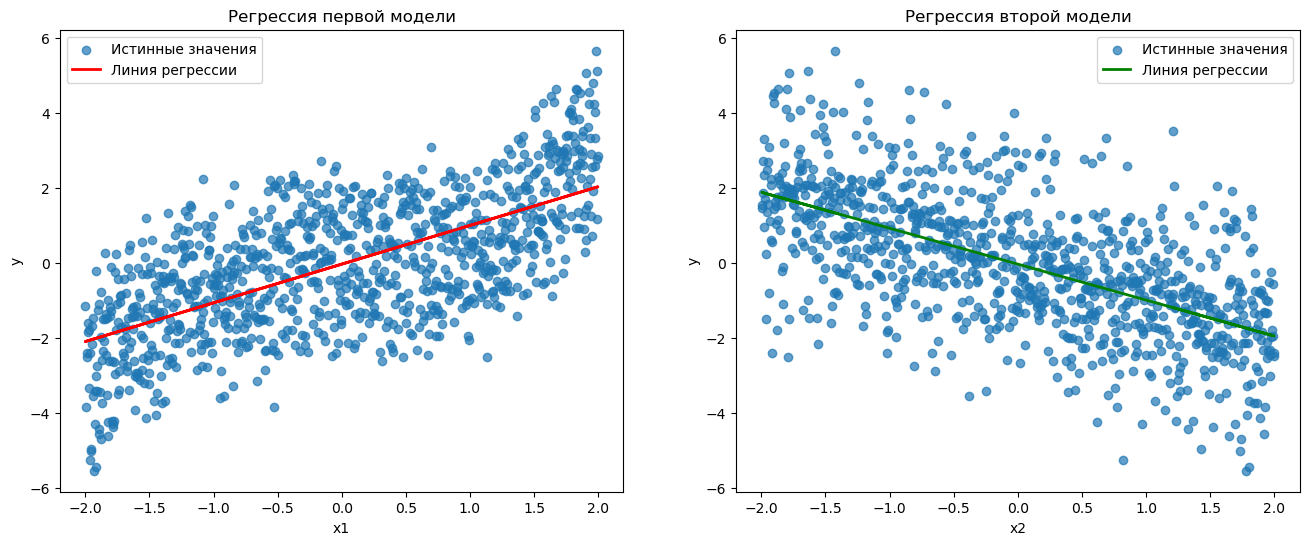

In [499]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.scatter(x1, y, label='Истинные значения', alpha=0.7)
ax1.plot(x1, y_pred_x1, color='red', linewidth=2, label='Линия регрессии')
ax1.set_title('Регрессия первой модели')
ax1.set_xlabel('x1')
ax1.set_ylabel('y')
ax1.legend()

ax2.scatter(x2, y, label='Истинные значения', alpha=0.7)
ax2.plot(x2, y_pred_x2, color='green', linewidth=2, label='Линия регрессии')
ax2.set_title('Регрессия второй модели')
ax2.set_xlabel('x2')
ax2.set_ylabel('y')
ax2.legend()

plt.show()


**Выводы:**

График по модели 1:
1. Точки расположены вокруг восходящей линии.
2. Линия регрессии имеет положительный наклон, то есть при увеличении значения ```x1``` значение ```y``` также увеличивается.
3. Несмотря на разброс точек, виден общий тренд: чем больше ```x1```, тем больше ```y```.
4. Между ```x1``` и ```y``` существует прямая линейная зависимость.

График по модели 2:
1. Точки расположены вокруг линии с отрицательным наклоном.
2. Значит обратную связь: при увеличении ```x2``` значение ```y``` уменьшается.
3. Точки распределены более хаотично и линия находится ближе к «центру облака» точек.
4. Зависимость тоже есть, но выражена слабее, чем в модели 1.
   
На визуализации видно, что модель 1 лучше описывает данные: тренд линейной зависимости просматривается чётко, облако точек плотнее прилегает к линии регрессии. Для модели 2 наблюдается обратная связь, но точек, выходящих далеко за пределы линии, больше, что подтверждает более слабую линейную зависимость.

**1.7 Построение графика с разницей предсказанного и истинного значения по каждой точке.**

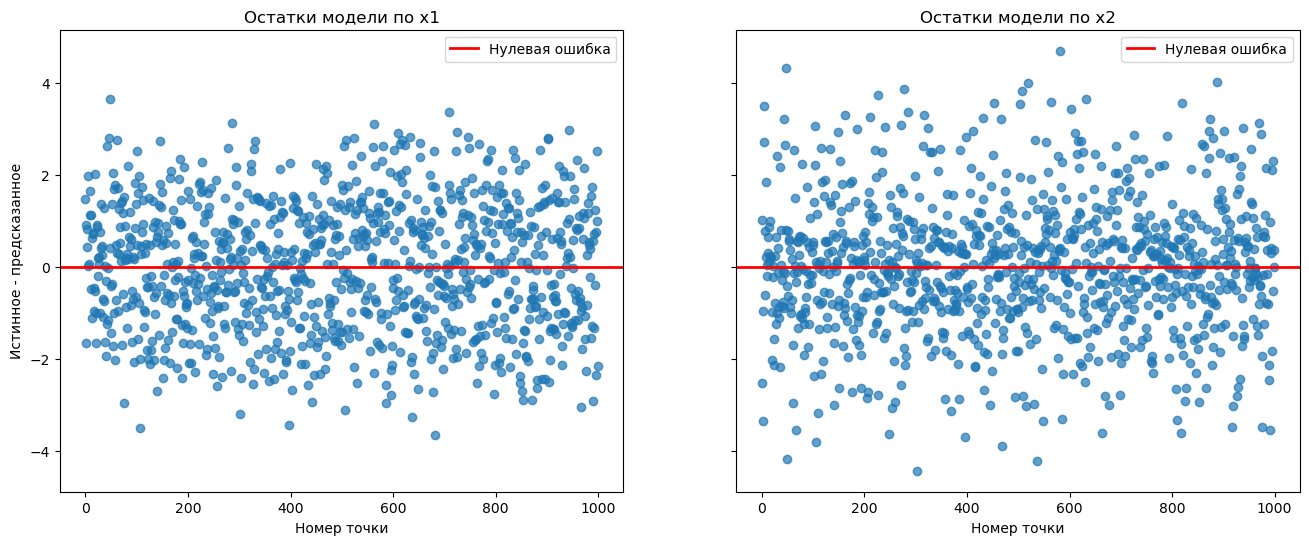

In [500]:
# Расчёт остатков
# Остаток = фактическое значение y - предсказанное моделью
residuals_x1 = y - y_pred_x1
residuals_x2 = y - y_pred_x2

# Создание фигуры с двумя графиками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# График остатков для модели по x1
ax1.scatter(range(len(y)), residuals_x1, alpha=0.7)
ax1.axhline(y=0, color='red', linewidth=2, label='Нулевая ошибка')
ax1.set_title('Остатки модели по x1')
ax1.set_xlabel('Номер точки')
ax1.set_ylabel('Истинное - предсказанное')
ax1.legend()

# График остатков для модели по x2
ax2.scatter(range(len(y)), residuals_x2, alpha=0.7)
ax2.axhline(y=0, color='red', linewidth=2, label='Нулевая ошибка')
ax2.set_title('Остатки модели по x2')
ax2.set_xlabel('Номер точки')
ax2.legend()

plt.show()


**Выводы:**

На графиках показаны остатки двух моделей: по признаку ```x1``` и по признаку ```x2```. Остатки - это разница между истинным значением ```y``` и предсказанным моделью значением. Идеальная модель имела бы точки, расположенные ровно на линии нулевой ошибки (красная линия).

Графики по моделям:
1. В обеих моделях точки распределены хаотично вокруг нулевой линии, без явного тренда. Это означает, что модели не имеют систематической ошибки и не завышают/занижают прогноз на всём диапазоне данных.
2. Однако разброс остатков у модели 2 меньше, чем у модели 1. Это подтверждает, что модель 2 предсказывает точнее, и её ошибки меньше по величине.
3. У модели 1 остатки более "рассыпаны", заметно больше точек далеко от нулевой линии, что отражает более высокие значения MSE, MAE и RMSE.
4. У модели 2 остатки более компактные и ближе к нулю, что согласуется с лучшими метриками качества и более адекватной линией регрессии.

Модель 2 показывает меньший разброс ошибок и более стабильные предсказания. Модель 1 ошибается сильнее и менее уверенно описывает данные.

**1.8 Построение графика предсказанных и истинных значений.**

На графиках показано, как предсказания моделей соотносятся с реальными значениями целевой переменной. Красная диагональная линия показывает идеальный случай, когда предсказание полностью совпадает с истинным значением (```Predicted = Actual```). Чем ближе точки расположены к этой линии, тем точнее модель.

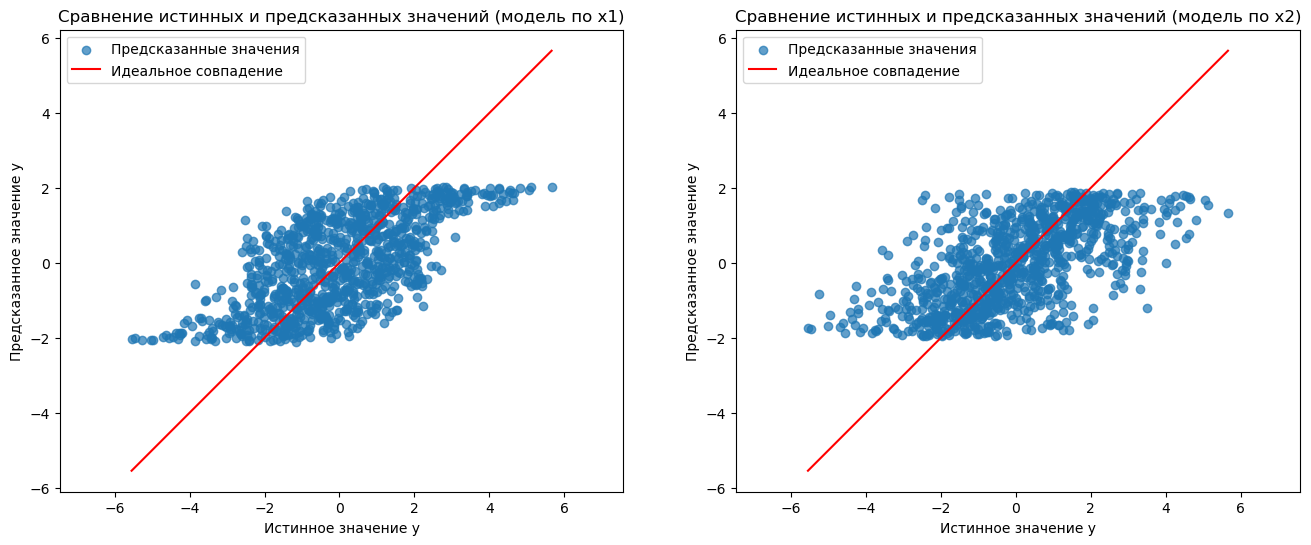

In [501]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# График для модели по x1
min_val = min(y.min(), y_pred_x1.min())
max_val = max(y.max(), y_pred_x1.max())

ax1.scatter(y, y_pred_x1, alpha=0.7, label='Предсказанные значения')
ax1.plot([min_val, max_val], [min_val, max_val], color='red', label='Идеальное совпадение')
ax1.set_title('Сравнение истинных и предсказанных значений (модель по x1)')
ax1.set_xlabel('Истинное значение y')
ax1.set_ylabel('Предсказанное значение y')
ax1.legend()
ax1.axis('equal')  # оси с одинаковым масштабом для корректного сравнения

# График для модели по x2 
min_val = min(y.min(), y_pred_x2.min())
max_val = max(y.max(), y_pred_x2.max())

ax2.scatter(y, y_pred_x2, alpha=0.7, label='Предсказанные значения')
ax2.plot([min_val, max_val], [min_val, max_val], color='red', label='Идеальное совпадение')
ax2.set_title('Сравнение истинных и предсказанных значений (модель по x2)')
ax2.set_xlabel('Истинное значение y')
ax2.set_ylabel('Предсказанное значение y')
ax2.legend()
ax2.axis('equal')

plt.show()


**Выводы:**

График по модели 1:
1. Точки заметно отклоняются от линии идеального совпадения и формируют размытое облако.
2. Видно, что модель переоценивает значения в нижней части графика и недооценивает значения в верхней.
3. Модель 1 предсказывает не очень точно и слабо отражает реальную зависимость.

График по модели 2:
1. Точки также не лежат строго на линии, видно, что их облако ближе к диагонали, чем у модели 1.
2. Точки распределены более плотным коридором вдоль красной линии - значит, предсказания модели 2 чаще ближе к истинным значениям.
3. Предсказания модели 2 выглядят стабильнее и значительно лучше отражают закономерность в данных.
   
Обе модели допускают ошибки, что видно по разбросу точек. Однако модель 2 точнее: её предсказания расположены ближе к линии идеального совпадения. График подтверждает предыдущие выводы по метрикам (MAE, MSE, R2), где модель 2 также показала лучшее качество. Таким образом, модель, использующая признак ```x2```, предсказывает значение y заметно точнее, чем модель, построенная по ```x1```.


**1.9 Выводы по первой части.**

1. Все метрики ошибок (MSE, MAE, RMSE) у второй модели ниже, чем у первой, значит она допускает меньшие ошибки и её прогнозы ближе к реальным значениям.
2. Коэффициент детерминации R2 у первой модели равен 0.42827 - это низкое значение, которое говорит о том, что модель практически не объясняет вариацию целевой переменной. Связь между ```x1``` и ```y``` слабая.
3. У второй модели R2 = 0.36957, это значение выше, чем у первой модели. Хотя оно тоже не очень высокое, но уже указывает на наличие более выраженной линейной связи между ```x2``` и ```y```. Следовательно, признак ```x2``` лучше влияет на предсказание ```y```.
4. По графикам визуализации регрессии видно, что линия первой модели расположена почти горизонтально, что говорит об отсутствии зависимости между ```x1``` и ```y```: модель предсказывает почти одно и то же значение вне зависимости от значения признака. У второй модели линия регрессии имеет явный наклон и проходит ближе к точкам данных, что показывает более явную закономерность.
5. На графике остатков видно, что у первой модели остатки (ошибки) более разбросаны, тогда как у второй модели их облако плотнее и расположено ближе к нулевой линии. Это подтверждает, что вторая модель предсказывает точнее.
6. На графике сравнения предсказанных и истинных значений точки второй модели находятся ближе к линии идеального совпадения - у первой модели разброс больше.

Модель, построенная по признаку ```x2```, показывает лучшее качество предсказания и сильнее отражает зависимость между признаком и целевой переменной. Первая модель по ```x1``` предсказывает хуже и практически не выявляет линейной зависимости.

### **Часть 2. Полиномиальная регрессия**

**2.1 Выбор модели для полиномиальной регрессии, реализация модели полиномиальной регрессии.**

Для полиномиальной регрессии была выбрана вторая модель (```x2 - y```). У модели 2 коэффициент R2 выше, чем у модели 1. Это означает, что ```x2``` лучше объясняет изменение ```y```. Первая модель имеет линию регрессии, практически не меняющуюся при изменении ```x1``` - то есть связь между ```x1``` и ```y``` слабая. Графики остатков и сравнение предсказанных значений показали, что модель по ```x2```даёт меньшие ошибки и предсказывает точнее.
Поэтому применение полиномиальной регрессии целесообразнее именно для признака ```x2```, так как у него уже есть линейная зависимость с ```y```, и усложнение модели полиномиальным выражением может улучшить предсказание.

Степень полинома выбрана равной 2, так как это стандартный и оптимальный вариант для проверки нелинейной зависимости.

In [506]:
# Подготовка данных
x = df_var2[['x2']]
y = df_var2['y']

# Выбор степени полинома
degree = 2

# Создание полиномиальных признаков
poly = PolynomialFeatures(degree=degree)    

**2.2 - 2.4 Обучение полиномиальной регрессии, выполнение предсказания, подсчет и вывод метрик качества регресии (MAE, R2).**

In [507]:
x_poly = poly.fit_transform(x)

# Обучение модели полиномиальной регрессии
poly_model = LinearRegression()
poly_model.fit(x_poly, y)

# Предсказание значений целевой переменной
y_poly_pred = poly_model.predict(x_poly)

# Подсчет метрик качества модели
mae_poly = mean_absolute_error(y, y_poly_pred)
r2_poly = r2_score(y, y_poly_pred)

# Вывод результатов с округлением до 5 знаков
print(f"Полиномиальная регрессия (степень = 2)")
print(f"MAE: {mae_poly:.5f}")
print(f"R2: {r2_poly:.5f}")

Полиномиальная регрессия (степень = 2)
MAE: 1.10073
R2: 0.36970


**Вывод:**

Полиномиальная регрессия степени 2 не показала улучшения по сравнению с линейной моделью: значение MAE осталось практически тем же, а коэффициент детерминации R2 изменился незначительно. Это говорит о том, что зависимость между ```x2``` и ```y``` преимущественно линейная, и использование полиномиальной модели не даёт ощутимого выигрыша в точности.

**2.5 Визуализация регрессии: точки и линия регрессии.**

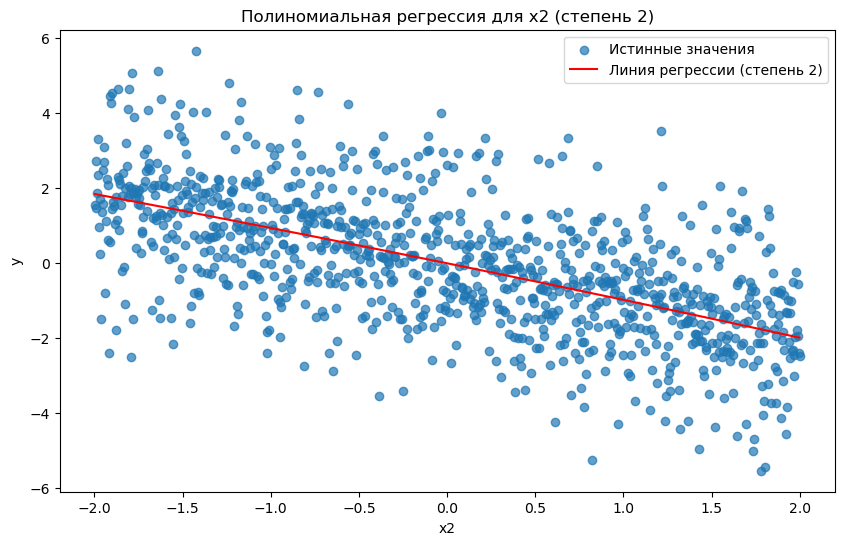

In [508]:
# Сортировка значений для корректного построения линии полиномиальной регрессии
sort_idx = np.argsort(x.values.flatten())               # Индексы сортировки по x
x_sorted = x.values.flatten()[sort_idx]                 # Сортированный x
y_poly_pred_sorted = y_poly_pred[sort_idx]              # y в таком же порядке

# Построение графика
plt.figure(figsize=(10, 6))

# Точки исходных данных
plt.scatter(x.values.flatten(), y, label='Истинные значения', alpha=0.7)

plt.plot(x_sorted, y_poly_pred_sorted, color='red', label=f'Линия регрессии (степень {degree})')

plt.title(f"Полиномиальная регрессия для x2 (степень {degree})")
plt.xlabel('x2')
plt.ylabel('y')
plt.legend()
plt.show()

**Выводы по графику:**
1. Тренд зависимости между ```x2``` и ```y``` остаётся линейным. Несмотря на использование полиномиальной регрессии степени 2, линия практически не изгибается и ведёт себя почти как обычная линейная регрессия. То есть квадратичный член в модели не даёт существенного улучшения.
2. Линия достаточно близко проходит через облако точек. Из этого следует, что зависимость между ```x2``` и ```y``` действительно есть, и модель её улавливает.
3. Разброс точек остаётся значительным. Это означает, что помимо ```x2``` на ```y``` влияют и другие факторы, которые модель не учитывает.

**2.6 Повторение пунктов 1-5 для другой степени полинома.**

Конкретная степень полинома не была выбрана. Был реализован перебор степеней от 1 до 6 и реализована таблица сравнения R2 и MAE для анализа разных значений полинома.

In [509]:
# Перебор степеней от 1 до 6
results = []

for degree in range(1, 7):
    poly = PolynomialFeatures(degree=degree)

    # Преобразование X
    x_poly = poly.fit_transform(x)

    # Обучение модели
    model = LinearRegression()
    model.fit(x_poly, y)

    # Предсказание
    y_pred = model.predict(x_poly)

    # Метрики
    mae = round(mean_absolute_error(y, y_pred), 5)
    r2 = round(r2_score(y, y_pred), 5)

    # Сохранение результатов
    results.append([degree, mae, r2])

# Формируем таблицу
df_poly_results = pd.DataFrame(results, columns=["Степень полинома", "MAE", "R2"])
df_poly_results

Степень полинома      MAE       R2
0                 1  1.10044  0.36957
1                 2  1.10073  0.36970
2                 3  1.10156  0.36992
3                 4  1.10188  0.36997
4                 5  1.10202  0.37000
5                 6  1.10231  0.37082

**Вывод:**
1. При степени 1 и 2 результаты почти одинаковые.
2. При степени от 3 и выше модель начинает ухудшаться по MAE (ошибка растёт), а R2 растёт незначительно.
3. При 6 степени R2 увеличился, но MAE ухудшился - модель становится более сложной и начинается переобучение.

На основании таблицы метрик можно сделать вывод, что увеличение степени полинома практически не улучшает качество модели. MAE начинает расти уже с 3 степени, а R2 изменяется незначительно. Таким образом, оптимальной является модель степени 1 (линейная). Если необходимо применить полиномиальную регрессию, то наилучшим выбором является степень 2, так как она не даёт ухудшения точности и одновременно остаётся простой и интерпретируемой.

**2.7 Выводы по второй части.**

В ходе эксперимента была построена полиномиальная регрессия для переменной ```x2``` с различными степенями полинома: от 1 до 6. Для каждой модели были рассчитаны метрики качества - средняя абсолютная ошибка (MAE) и коэффициент детерминации (R2).

Результаты показали, что увеличение степени полинома практически не приводит к улучшению модели. При степени 1 (обычная линейная регрессия) ошибка MAE минимальная, а значение R2 уже достаточно высокое. При переходе к степеням 2, 3 и выше коэффициент R2 растёт крайне незначительно - всего на сотые доли процента, что говорит об отсутствии реального улучшения качества. При этом MAE постепенно увеличивается, что означает: чем выше степень полинома, тем больше ошибок допускает модель.

Это связано с тем, что слишком низкая степень полинома приводит к недообучению - модель слишком простая и может не улавливать зависимости в данных. Однако слишком высокая степень приводит к переобучению: модель начинает «запоминать» шум и случайные колебания данных, вместо того чтобы выявить общую тенденцию. Такое поведение ухудшает обобщающую способность модели и увеличивает ошибку при предсказаниях.

На основании анализа можно сделать вывод, что оптимальной является линейная модель (степень 1). Она обеспечивает наименьшую ошибку и не приводит к переусложнению. Если требуется использовать полиномиальную регрессию, допустимо применять полином степени 2, так как он остаётся достаточно простым и не ухудшает качество модели. Более высокие степени использовать нецелесообразно: прирост R2 минимален, а ошибки увеличиваются.


### **Часть 3 Решение задачи регрессии различными методами**

**3.1 Загрузка набора данных ```salary.csv```, просмотр данных и информации о датасете через ```info()```.**

In [510]:
df_salary = pd.read_csv('salary.csv')
display(df_salary.head())
display(df_salary.info())

age        income  experience  score_test  hours_worked  distance_to_work  \
0   56  70201.189680          25   87.559729            62          3.708690   
1   69  51901.897395          39   70.808381            36          7.082793   
2   46  38605.409293           4   63.324996            77          5.129154   
3   32  49949.736955          20   78.215505            33         19.315623   
4   60  48965.290095          13   74.429096            48          5.654904   

        savings          debt    education         city job_type  \
0  25987.334048   2556.821627          PhD      Chicago  Finance   
1  22134.899021    725.180513  High School      Houston   Retail   
2  47106.068408  12659.359583          PhD  Los Angeles  Finance   
3  15868.328813  12369.776003     Bachelor  Los Angeles       IT   
4  15734.633332   4792.095213     Bachelor      Phoenix       IT   

  marital_status  car remote_work         salary  
0         Single  Yes         Yes  106233.833479  
1         Single   No         Yes   87205.291042  
2        Married  Yes          No   69369.283522  
3        Married  Yes          No   76587.116955  
4        Married   No          No   71023.148842

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1500 non-null   int64  
 1   income            1500 non-null   float64
 2   experience        1500 non-null   int64  
 3   score_test        1500 non-null   float64
 4   hours_worked      1500 non-null   int64  
 5   distance_to_work  1500 non-null   float64
 6   savings           1500 non-null   float64
 7   debt              1500 non-null   float64
 8   education         1500 non-null   object 
 9   city              1500 non-null   object 
 10  job_type          1500 non-null   object 
 11  marital_status    1500 non-null   object 
 12  car               1500 non-null   object 
 13  remote_work       1500 non-null   object 
 14  salary            1500 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 175.9+ KB


None

**3.2 Выделение целевой переменной, построение ```boxplot``` и гистограммы для целевой переменной.**

В качестве целевой переменной была выбрана ```salary```, так как цель исследования - построить модель для предсказания годовой зарплаты на основании социально-экономических факторов. Выбор другой переменной технически возможен, однако противоречит постановке задачи.

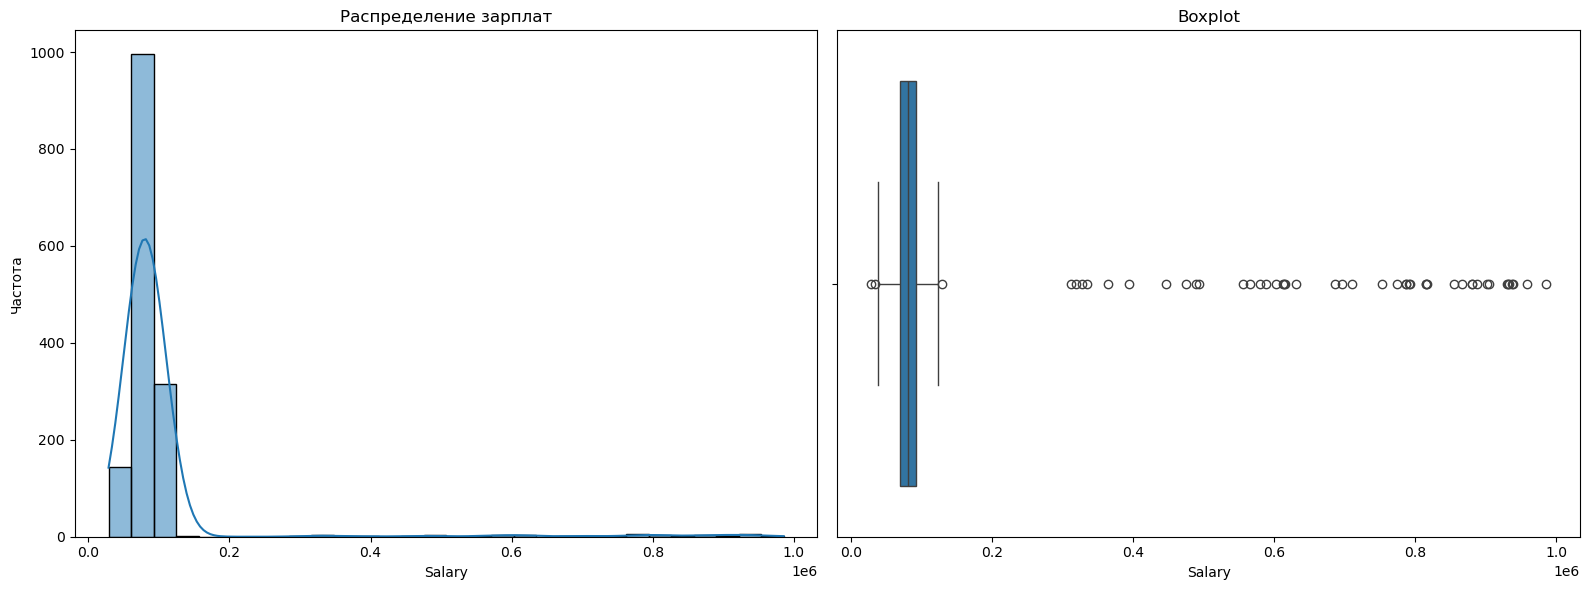

In [511]:
# Целевая переменная (y)
y = df_salary['salary']

# Визуализация целевой переменной
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.histplot(y, bins=30, kde=True)
plt.title('Распределение зарплат')
plt.xlabel('Salary')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(x=y)
plt.title('Boxplot')
plt.xlabel('Salary')

plt.tight_layout()
plt.show()


**Выводы по графикам:**

На графиках показано распределение годовой зарплаты сотрудников из выборки (гистограмма и ```boxplot```).

1. Распределение сильно смещено вправо. Большая часть сотрудников получает зарплату в диапазоне примерно от 50 000 до 150 000 USD. Но на графике видно длинный «хвост» справа - это означает наличие сравнительно небольшого количества людей с очень высокой зарплатой (до 1 000 000 USD).
2. ```Boxplot``` показывает множество выбросов. На правой части ```boxplot``` видно большое количество точек - это выбросы, то есть сотрудники с зарплатами, значительно превышающими основную массу данных.
3. Среднее значение зарплаты будет выше медианы. Из-за наличия высоких зарплат (выбросов) среднее «тянется» вверх.

Таким образом, перед построением модели стоит рассмотреть трансформацию данных, чтобы уменьшить влияние выбросов и улучшить качество предсказания.

**3.3 Обработка выбросов, визуализация после обработки.**

После анализа распределения зарплат методом ```boxplot``` было выявлено большое количество выбросов. Для корректной работы моделей регрессии выбросы были обработаны с использованием метода ```IQR``` (межквартильного размаха).

Нижняя граница: 36501.06
Верхняя граница: 124718.65
Размер исходного датасета: 1500
Размер после удаления выбросов: 1452


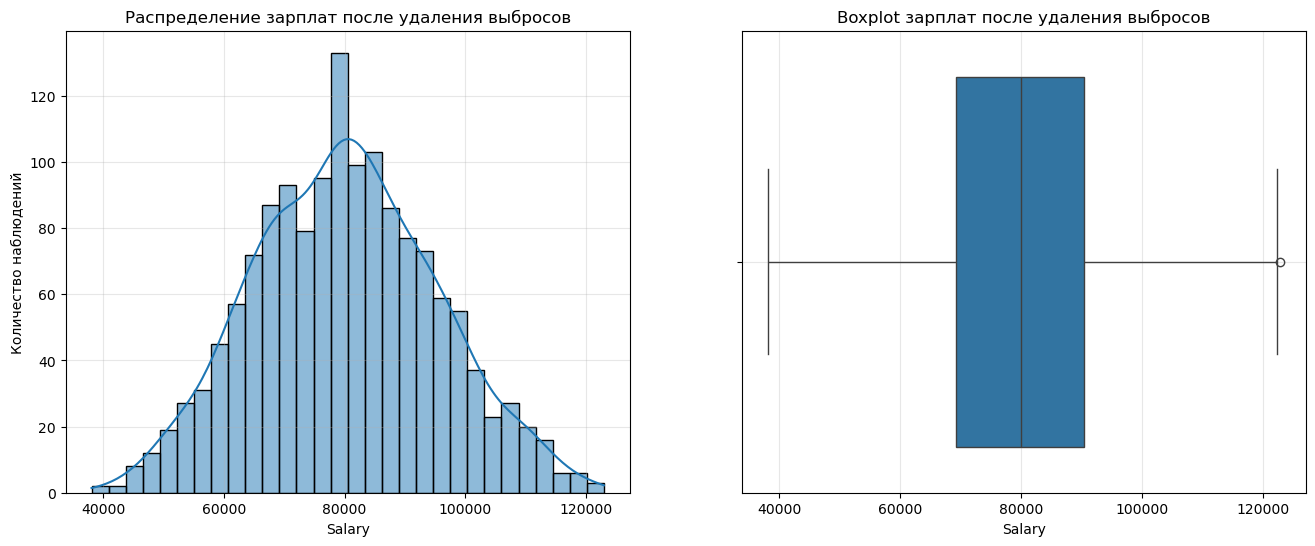

In [512]:
# Определяем границы по методу IQR
Q1 = df_salary['salary'].quantile(0.25)
Q3 = df_salary['salary'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Нижняя граница: {lower_bound:.2f}")
print(f"Верхняя граница: {upper_bound:.2f}")

# Фильтрация данных (удаляем выбросы)
df_salary_filtered = df_salary[(df_salary['salary'] >= lower_bound) & (df_salary['salary'] <= upper_bound)]

print(f"Размер исходного датасета: {df_salary.shape[0]}")
print(f"Размер после удаления выбросов: {df_salary_filtered.shape[0]}")

# Визуализация после обработки
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Гистограмма после удаления выбросов
sns.histplot(df_salary_filtered['salary'], bins=30, kde=True, ax=ax1)
ax1.set_title('Распределение зарплат после удаления выбросов')
ax1.set_xlabel('Salary')
ax1.set_ylabel('Количество наблюдений')
ax1.grid(alpha=0.3)

# Boxplot после удаления выбросов
sns.boxplot(x=df_salary_filtered['salary'], ax=ax2)
ax2.set_title('Boxplot зарплат после удаления выбросов')
ax2.set_xlabel('Salary')
ax2.grid(alpha=0.3)

plt.show()

**Выводы:**

После применения метода ```IQR``` для удаления выбросов распределение целевой переменной ```salary``` значительно изменилось.

1. Гистограмма после удаления выбросов:
- Распределение стало более симметричным и похоже на нормальное.
- Исчез "длинный хвост" вправо, который наблюдался до очистки данных.
- Основная масса значений теперь находится в диапазоне примерно от 36 000 до 125 000.
2. ```Boxplot``` после удаления выбросов:
- На графике видно, что выбросы практически отсутствуют.
- Диапазон значений стал компактнее, что говорит о более стабильной выборке.
3. Статистика по размеру выборки:
- Было удалено 48 строк из 1500.
- Значит, выбросов было немного, но они могли искажать результаты моделей.

В ходе анализа целевой переменной были выявлены выбросы, которые искажали распределение и могли негативно сказаться на качестве модели регрессии. Для их поиска использовался метод межквартильного размаха. После удаления выбросов распределение зарплат стало более симметричным и ближе к нормальному. ```Boxplot``` подтверждает отсутствие экстремальных значений. Это улучшает качество данных и делает модель более устойчивой.

**3.4 Построение матрицы диаграммы рассеяния.**

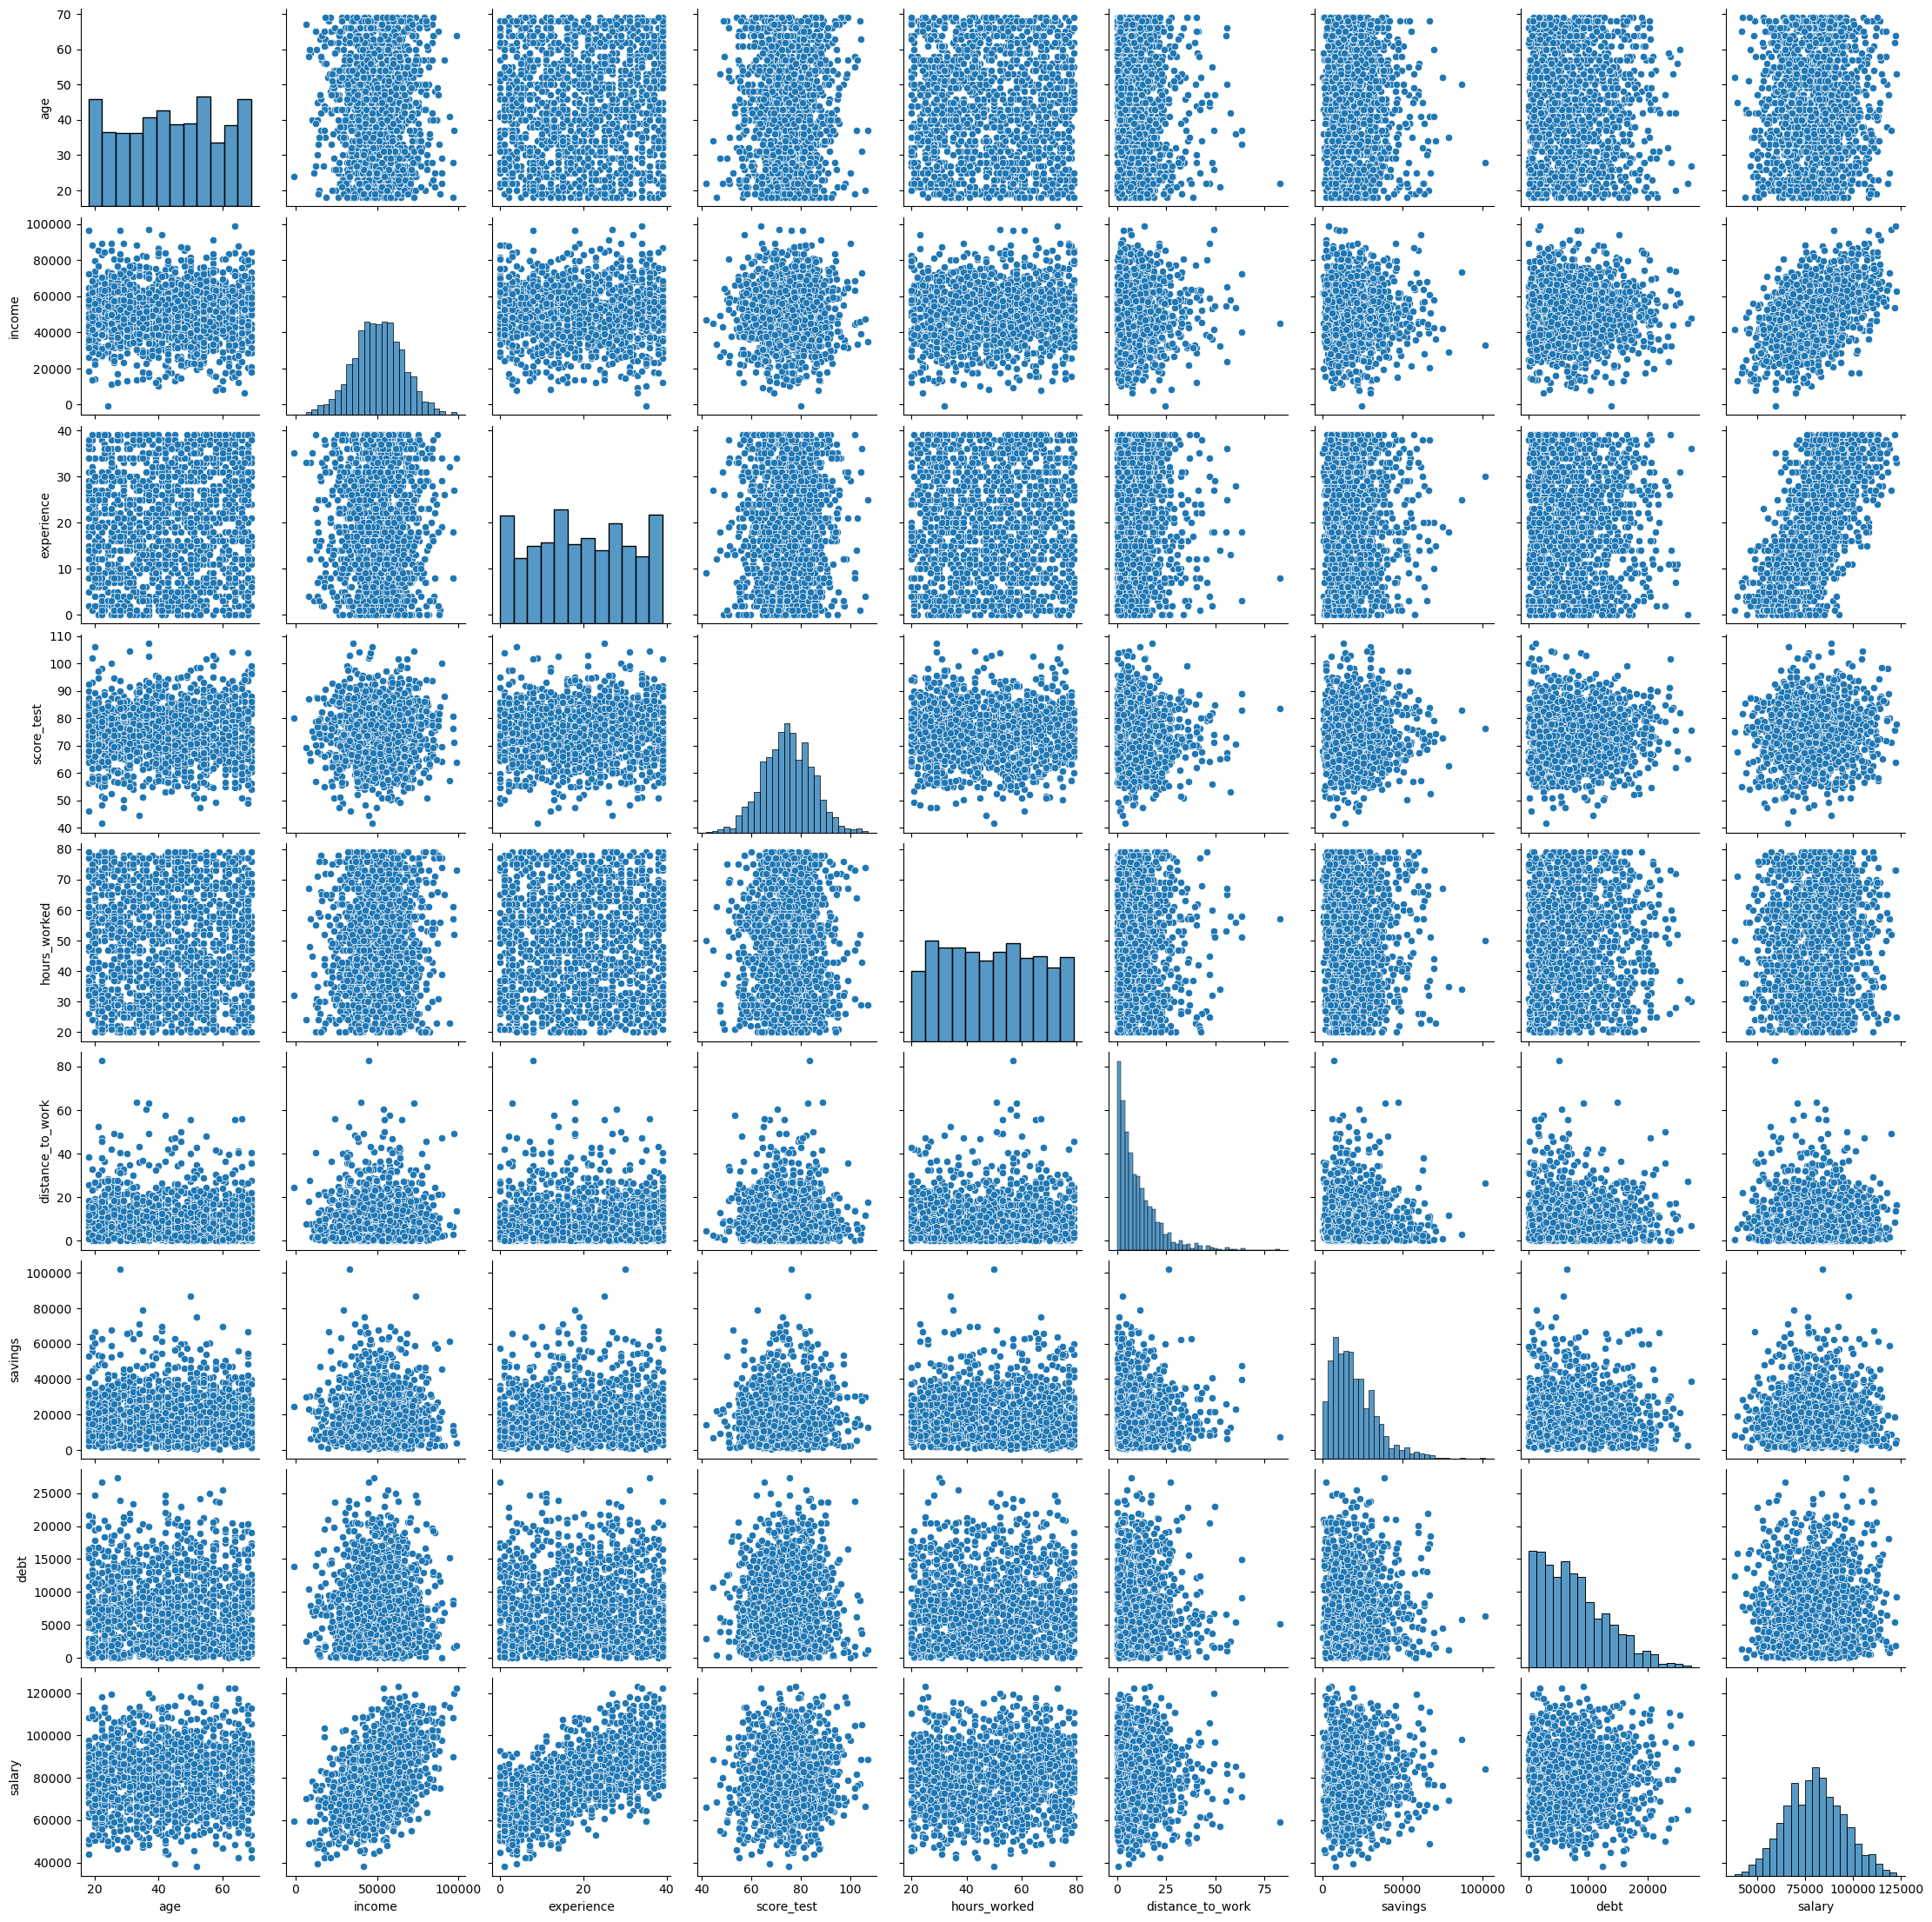

In [513]:
numerical_features = ['age', 'income', 'experience', 'score_test', 'hours_worked', 'distance_to_work', 'savings', 'debt', 'salary']

sns.pairplot(df_clean[numerical_features])
plt.show()

**3.5 Разделение данных на обучающую и валидационные выборки.**

In [514]:
# Обновляем X и y после очистки
y = df_clean['salary']
X = df_clean.drop('salary', axis=1)

# Разделение данных: 80% на обучение, 20% на тест
# random_state=42 - для воспроизводимости результата
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Размер обучающей выборки (X_train): {X_train.shape}")
print(f"Размер тестовой выборки (X_test):   {X_test.shape}")
print(f"Размер обучающей выборки (y_train): {y_train.shape}")
print(f"Размер тестовой выборки (y_test):   {y_test.shape}")

Размер обучающей выборки (X_train): (1161, 14)
Размер тестовой выборки (X_test):   (291, 14)
Размер обучающей выборки (y_train): (1161,)
Размер тестовой выборки (y_test):   (291,)


1. В обучающей выборке 1161 строка и 14 признаков (столбцов). Модель будет учиться на этих данных.
2. В тестовой выборке 291 строка и тоже 14 признаков. Эти данные модель не видела при обучении - они нужны для проверки качества модели.
3. В ```y_train``` - 1161 значение зарплаты (целевой переменной), соответствующее обучающим данным.
4. В ```y_test``` - 291 значение зарплаты для тестовой выборки. На них мы сравним предсказания модели с реальностью.

**3.6 Нормализация данных.**

In [515]:
from sklearn.preprocessing import StandardScaler
# Отделяем числовые признаки
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
# Инициализируем стандартизатор
scaler = StandardScaler()
# Обучаем scaler только на обучающих данных
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
# Применяем к тестовым данным (только transform!)
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

**3.7 Обучение модели через LinearRegression.**

In [516]:
# Создание и обучение модели на обработанных данных
model_lr = LinearRegression()
model_lr.fit(X_train_processed, y_train)


LinearRegression()

**3.8 Применение обученной модели на тестовой выборке и оценка качества с помощью метрик.**

In [517]:
# Делаем предсказания
y_pred = model_lr.predict(X_test_processed)

# Расчет метрик
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Метрики")
print(f"MSE: {mse:.5f}")
print(f"RMSE: {rmse:.5f}")
print(f"MAE: {mae:.5f}")
print(f"R2: {r2:.5f}")


Метрики
MSE: 36935814.39414
RMSE: 6077.48422
MAE: 4864.28009
R2: 0.86634


**Выводы:**

1. MAE = 4864 долларов. В среднем модель ошибается примерно на 4.8 тыс. долларов в предсказании зарплаты. Для задач предсказания зарплаты - это довольно хорошая точность, учитывая, что зарплаты находятся в диапазоне 30-120 тыс. долларов.
2. RMSE = 6077 долларов. Сильных выбросов немного, модель в целом стабильна.
3. MSE = 36.9 млн. Значение выглядит большим, но MSE работает в квадрате величины ошибки, поэтому для зарплат в десятки тысяч это нормально и ожидаемо. Используется не для интерпретации, а для сравнения моделей между собой.
4. R2 = 0.86634 (86.6%). Высокий показатель - модель объясняет 86.6% всей вариации зарплаты на тестовых данных.

Для реальных данных с человеческим фактором (влияние города, образования, стиля жизни) это отличный результат. Линейная регрессия хорошо справляется с задачей. Модель объясняет большую часть зависимости между признаками и зарплатой, и средняя ошибка составляет около 4.8 тыс. долларов, что является хорошим качеством для данного набора данных.

**3.9 Создание и вывод датафрема с истинными и предсказанными значениями.**

In [518]:
# Предсказание модели на тестовых данных
y_pred = model_lr.predict(X_test_processed)

# Создаём DataFrame для сравнения фактических и предсказанных значений
df_results = pd.DataFrame({
    "Actual_salary": y_test.values,
    "Predicted_salary": y_pred
}).round(2)

display(df_results.head())
display(df_results.tail())


Actual_salary  Predicted_salary
0       90772.28          90117.11
1       84475.35          88639.51
2       67777.68          63882.12
3      110650.66         106502.06
4       68551.17          67807.23

Actual_salary  Predicted_salary
286      103280.49          90251.84
287       80110.20          83453.56
288       75850.02          73026.00
289       76908.96          78718.01
290      105300.24         105426.86

**Вывод:**

В таблице представлены реальные значения зарплаты и те, которые предсказала модель на тестовой выборке. Сравнение показывает, что модель в большинстве случаев предсказывает зарплату достаточно близко к фактическим значениям.
1. Разница между ```Actual_salary``` и ```Predicted_salary``` обычно составляет несколько тысяч долларов.
2. В некоторых случаях предсказание немного завышено или занижено, что является нормальным для регрессионных моделей.
3. Для отдельных примеров (например, на последней строке) предсказание почти полностью совпадает с реальным значением зарплаты, что подтверждает способность модели находить закономерности в данных.

С учётом ранее полученных метрик качества, можно сделать вывод, что модель точно оценивает зарплату и объясняет около 86% вариации данных, что является очень хорошим результатом для реальных данных.

**3.10 Создание датафрейма с с признаками и значением коэффициентов для каждого признака.**

In [520]:
# Создаём DataFrame с коэффициентами
coef_df = pd.DataFrame({
    'Feature': X_train_processed.columns,
    'Coefficient': model_lr.coef_
})

# Сортировка по абсолютному значению коэффициента (самые важные признаки сверху)
coef_df['abs_value'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_value', ascending=False)

print("Важность признаков (коэффициенты линейной модели):")
display(coef_df[['Feature', 'Coefficient']])

Важность признаков (коэффициенты линейной модели):


Feature   Coefficient
10           education_PhD  12699.221635
2               experience  10296.744782
1                   income   7355.197193
9         education_Master   6612.583313
8    education_High School  -6033.649289
17             job_type_IT   4109.192167
15        job_type_Finance   2484.270661
13           city_New York   1426.901299
3               score_test   1170.790753
21                 car_Yes  -1095.468114
12        city_Los Angeles   1000.881431
16     job_type_Healthcare    723.438874
18         job_type_Retail   -695.077232
14            city_Phoenix    568.499555
4             hours_worked    454.730563
22         remote_work_Yes    379.892648
7                     debt   -340.879498
0                      age    288.264527
19  marital_status_Married    262.628779
20   marital_status_Single    251.942502
11            city_Houston    238.629319
5         distance_to_work    -51.390755
6                  savings     21.056314

**Вывод:**

Анализ коэффициентов линейной модели позволяет определить, какие факторы сильнее всего влияют на размер зарплаты.

Наиболее значимые признаки:
1. Уровень образования - ```PhD``` (12 699): самый сильный положительный фактор. Наличие степени ```PhD``` значительно повышает зарплату. Высокий уровень формального образования играет существенную роль в доходе.
2. Опыт - ```experience``` (10 297): количество лет опыта сильно увеличивает зарплату. Чем больше опыт, тем выше доход, что логично.
3. Доход - ```income``` (7 355): уровень дохода до рассматриваемой зарплаты (например, предыдущая работа) также положительно влияет на итоговую зарплату.
4. Образование - ```Master``` (6 612): наличие магистратуры тоже существенно увеличивает зарплату, но чуть меньше, чем ```PhD```.
5. Образование - ```High School``` (-6 033): окончание только школы приводит к существенному снижению зарплаты относительно других уровней образования.

Влияние типа работы и города:
1. ```Job_type_IT``` (4 109) и ```Job_type_Finance``` (2 484) - работа в IT и финансах значительно повышает доход.
2. ```Job_type_Retail``` (-695) - работа в ритейле снижает зарплату.
3. Город также влияет: New York и Los Angeles увеличивают зарплату, но влияние умеренное.

Дополнительные факторы
1. ```Score_test``` (1 170): чем выше результаты тестов/оценочных испытаний, тем выше зарплата.
2. ```Hours_worked``` (455): больше часов - немного выше зарплата, но влияние слабое.
3. ```Debt``` (-341): наличие долгов слегка снижает уровень зарплаты.
4. Машина - ```car_Yes``` (-1 095): наличие автомобиля связано с уменьшением зарплаты (возможно, косвенно отражает более дешёвые регионы проживания или особенность выборки).

Наименее значимые признаки:
```Savings``` (21) и ```distance_to_work``` (-51) практически не влияют на зарплату. Их вклад минимален и не имеет значения в контексте модели.

То есть:
1. На зарплату больше всего влияет уровень образования, опыт и сфера деятельности.
2. Наиболее положительное влияние оказывают: ```PhD```, большой опыт, работа в IT/Finance.
3. Наиболее негативное влияние: низкий уровень образования (только High School) и работа в Retail.
4. Личные факторы, такие как наличие машины, семейное положение, сбережения или расстояние до работы, практически не влияют.

Таким образом, модель показывает, что карьерный и образовательный статус оказывают значительно большее влияние на зарплату, чем бытовые или демографические факторы.

**3.11 Визуализация фактических и предсказанных значений.**

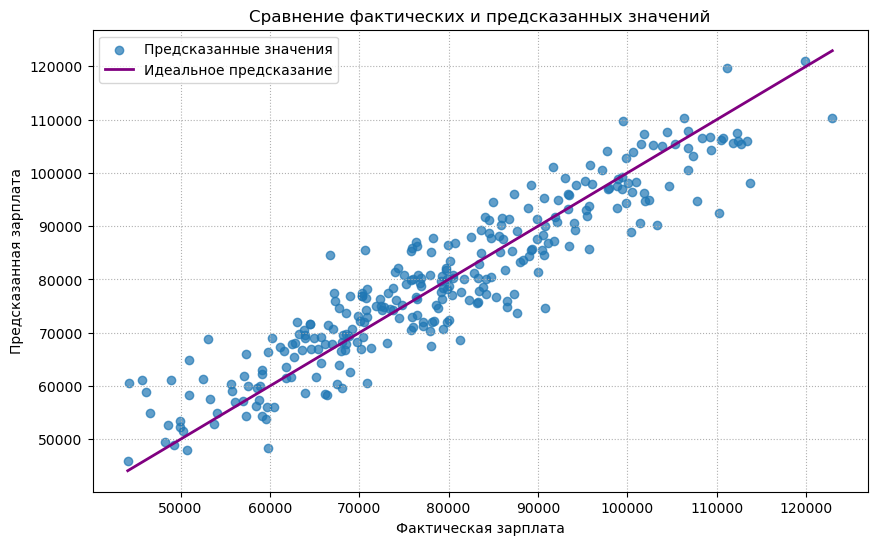

In [521]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Точки: фактические vs предсказанные значения
plt.scatter(y_test, y_pred, label="Предсказанные значения", alpha=0.7)

# Линия идеального предсказания
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val],
         color='purple', linewidth=2,
         label="Идеальное предсказание")

plt.xlabel("Фактическая зарплата")
plt.ylabel("Предсказанная зарплата")
plt.title("Сравнение фактических и предсказанных значений")

# Прерывистая (точечная) разметка на графике
plt.grid(True, linestyle=':')

plt.legend()
plt.show()


**Выводы по графику:**

1. Большинство точек расположено близко к фиолетовой линии. Модель хорошо справляется с прогнозированием зарплаты. Расхождение между фактическими и предсказанными значениями небольшое.
2. Наблюдается линейная зависимость. Чем выше фактическая зарплата, тем выше и предсказанная. Точки образуют «полосу» вдоль линии - это признак того, что модель улавливает основную закономерность в данных.
3. Есть небольшие отклонения (разброс точек). Некоторые точки расположены выше или ниже фиолетовой линии - это естественно и означает, что модель не всегда прогнозирует абсолютно точно, но ошибки невелики.
4. Отсутствуют значимые выбросы. Нет точек, значительно удалённых от общей группы, значит модель стабильна и не делает аномальных прогнозов.

Построенный график сравнения фактических и предсказанных значений показывает, что модель регрессии демонстрирует высокое качество прогнозирования. Большинство точек расположено близко к линии идеального предсказания, что говорит о хорошей точности модели. Ошибки предсказаний небольшие и распределены равномерно - модель не систематически завышает или занижает значения. Таким образом, модель адекватно описывает зависимость между признаками и целевой переменной (```salary```) и может использоваться для прогнозирования зарплаты на новых данных.

**3.12 Регрессия методом k-ближайших соседей.**

In [522]:
k = 5  # количество соседей
knn_model = KNeighborsRegressor(n_neighbors=k)

# Обучаем модель
knn_model.fit(X_train_processed, y_train)

# Предсказания 
y_pred_knn = knn_model.predict(X_test_processed)

# Метрики качества 
mse = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)

print(f"KNN Regression (k = {k})")
print(f"MSE:  {mse:.5f}")
print(f"RMSE: {rmse:.5f}")
print(f"MAE:  {mae:.5f}")
print(f"R2:   {r2:.5f}")


KNN Regression (k = 5)
MSE:  121737061.59651
RMSE: 11033.45193
MAE:  9026.55475
R2:   0.55946


**Выводы:**

Модель регрессии методом k-ближайших соседей (KNN, k = 5) показала значительно худшие результаты по сравнению с линейной регрессией. Ошибки предсказаний (MAE и RMSE) почти в два раза выше, а коэффициент детерминации R2 составляет лишь 0.56, что означает низкую объясняющую способность модели. KNN плохо справляется с задачей прогнозирования зарплаты на данном наборе данных, вероятно, из-за высокой размерности признаков и нелокального характера зависимости.

**3.13 Визуализация и сравнение фактического и предсказанного значений, сравнение результатов полученых всеми методами.**

Actual      Predicted  Predicted_k_method
1070   90772.277599   90117.106702        93088.662566
1161   84475.346122   88639.505404        77864.949040
1031   67777.676332   63882.119299        66207.287607
1360  110650.659849  106502.062033        86750.211491
552    68551.168300   67807.228647        69626.394846
637    79324.467916   70714.840623        73939.039645
916    59571.086625   53864.146222        70246.737211
50     90409.785269   85511.182937        85951.681297
1162   92280.580124   94850.451519       104989.162110
514    79311.102051   80720.941888        81072.065074

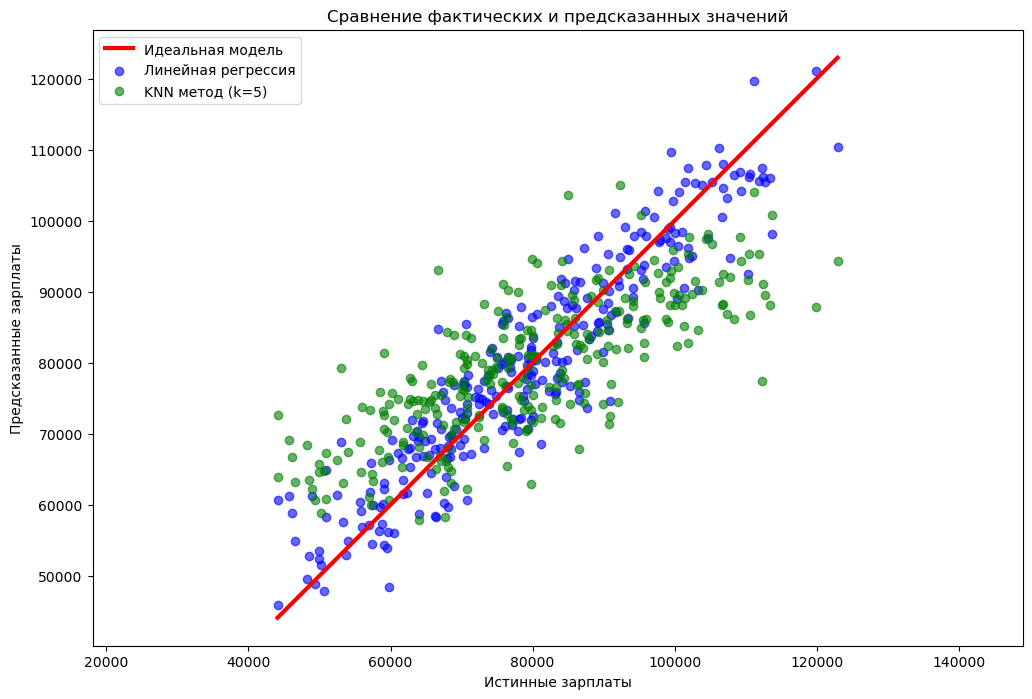

In [523]:
# Добавление предсказания KNN в DataFrame
df_results_lr['Predicted_k_method'] = y_pred_knn

display(df_results_lr.head(10))

plt.figure(figsize=(12, 8))

# Нахождение общих min/max для осей
min_val = min(y_test.min(), y_pred_lr.min(), y_pred_knn.min())
max_val = max(y_test.max(), y_pred_lr.max(), y_pred_knn.max())

# Идеальная линия предсказания
plt.plot(
    [min_val, max_val], [min_val, max_val],
    linewidth=3,
    color='red',
    label='Идеальная модель'
)

# Линейная регрессия
plt.scatter(
    y_test, y_pred_lr,
    alpha=0.6,
    label='Линейная регрессия',
    color='blue'
)

# Метод k-ближайших соседей
plt.scatter(
    y_test, y_pred_knn,
    alpha=0.6,
    label='KNN метод (k=5)',
    color='green'
)

plt.title('Сравнение фактических и предсказанных значений')
plt.xlabel('Истинные зарплаты')
plt.ylabel('Предсказанные зарплаты')
plt.legend()
plt.axis('equal')
plt.show()


**Выводы:**

```Predicted``` - линейная регрессия\
```Predicted_k_method``` - KNN (k=5)

Поведение линейной регрессии:
1. Линейная модель предсказывает зарплату стабильно.
2. Ошибка по модулю в большинстве случаев меньше, чем у KNN.
3. Она хорошо работает с высокими значениями (пример 4 и 9).

Поведение KNN:
1. KNN «усредняет» предсказание на основе ближайших точек.
2. Поэтому модель плохо работает с крайними значениями (4 - сильное недопредсказание).
3. В случаях, когда фактическое значение ближе к средней величине - KNN показывает себя неплохо (3, 5, 6).

**Анализ графика:**

Линейная регрессия (синие точки):
1. Точки расположены ближе к красной линии.
2. Ошибки распределяются равномерно по всей шкале зарплат.
3. Модель хорошо улавливает общую тенденцию роста зарплаты в зависимости от признаков.
4. Линейная регрессия лучше моделирует зависимость между признаками и зарплатой.

KNN (зелёные точки):
1. Точки расположены более рассеяно.
2. KNN часто «сглаживает» значения и тяготеет к средней зарплате.
3. Заметно, что модель не справляется с предсказанием высоких и низких значений зарплат - точки находятся ниже красной линии.
4. KNN хуже предсказывает крайние значения, так как усредняет значения ближайших точек.

Обе модели показывают положительную зависимость: чем выше истинная зарплата, тем выше предсказание. Но точность у моделей разная: линейная регрессия визуально и статистически показывает результат лучше. KNN даёт конкурентный результат в отдельных случаях, но имеет общую тенденцию сглаживать значения, из-за чего при значительных отклонениях от среднего - ошибается сильнее.



**3.14 Выводы по третьей части.**

Анализ метрик и визуализация показывают, что лучше использовать линейную регрессию.
По метрикам видно, что линейная модель значительно точнее:
1. MSE у линейной регрессии составляет 36 935 814, тогда как у модели k-ближайших соседей - 121 737 061, что почти в 3 раза хуже.
2. MAE также ниже у линейной регрессии (4864 против 9026), то есть средняя ошибка в прогнозе зарплаты в два раза меньше.
3. Коэффициент детерминации R2 у линейной модели равен 0.8663, а у KNN - 0.5595, что говорит о том, что линейная регрессия объясняет изменения целевой переменной гораздо лучше.

График предсказаний подтверждает метрики: точки линейной регрессии (синие на графике) располагаются ближе к линии идеального предсказания, тогда как точки KNN (зелёные) заметно больше рассредоточены и часто отклоняются от прямой.

Можно предположить, что:
1. Зависимость между входными признаками и зарплатой носит линейный характер, и поэтому линейная модель улавливает её лучше;
2. Для метода k-ближайших соседей, вероятно, недостаточно данных - при большем объёме выборки модель могла бы определить «похожих соседей» точнее.

Таким образом, линейная регрессия — оптимальная модель для данной задачи: она точнее, стабильнее и лучше отражает структуру данных.

### **Вывод по лабораторной работе:**

В первой части лабораторной работы были исследованы признаки x1 и x2 и их влияние на переменную y. Была построена модель простой линейной регрессии, посчитаны ключевые метрики для сравнения двух моделей: MSE, MAE, RMSE, R2. Проведено сравнение двух моделей, по этому сравнению можно сделать вывод, что вторая модель намного лучше справляется со своей задачей

Во второй части была изучена полиномиальная регрессия, для нее была выбрана одна из двух переменных, а именно x2. В первый раз, степень полинома 2. Во второй раз, конкретная степень полинома не была выбрана. Был реализован перебор степеней от 1 до 6 и реализована таблица сравнения R2 и MAE для анализа разных значений полинома.

В третьей части работы был проанализирован датасет, содержащий информацию о сотрудниках и их заработной плате. Набор данных включал как числовые признаки (возраст, опыт работы, доход, результаты тестов и др.), так и категориальные (город, уровень образования, тип занятости, наличие автомобиля и др.). Целью исследования было определить влияние различных факторов на уровень заработной платы и построить модель, способную предсказывать зарплату сотрудника.

На этапе предобработки были выполнены следующие действия:
1. удаление пропусков и выбросов;
2. разделение данных на обучающую и тестовую выборки (80/20);
3. нормализация числовых признаков с помощью ```StandardScaler```;
4. кодирование категориальных признаков методом ```One-Hot Encoding```.

Были проведены группировки и анализ через сводные таблицы, что позволило выявить закономерности: зарплата растёт с увеличением уровня образования (наибольшие доходы у сотрудников с ```PhD```), а также у работников ИТ-сферы и финансового сектора. В отдельных городах наблюдаются более высокие уровни зарплат, что подтверждает влияние местоположения компании.

Далее были построены две модели для предсказания зарплаты:
1. Линейная регрессия.
2. Регрессия методом k-ближайших соседей (kNN).

Для каждой модели были рассчитаны метрики качества (MSE, RMSE, MAE, R2). Линейная регрессия показала лучшие значения по всем метрикам:
1. R2 = 0.8663, что означает, что модель объясняет 87% вариации зарплат,
2. MSE и MAE значительно ниже, чем у kNN.

Анализ коэффициентов линейной регрессии позволил оценить важность признаков. Наиболее значимое влияние на зарплату оказали:
1. уровень образования (особенно наличие степени PhD),
2. опыт работы,
3. доход и тип работы (особенно ИТ и финансы).

Некоторые признаки показали отрицательное влияние (например, наличие долгов или работа в рознице). Это позволяет сделать вывод о логичности модели и соответствии выявленных связей реальным ожиданиям.

Итоговая визуализация, сравнивающая фактические и предсказанные значения, показала, что точки линейной регрессии располагаются ближе к линии идеального прогноза.

Проведённая работа доказала, что для данной задачи прогнозирования зарплаты эффективнее использовать линейную регрессию, так как зависимости между признаками и целевой переменной имеют преимущественно линейный характер. Предобработка данных и анализ показали важность учёта образования, профессиональной сферы и опыта работы при определении уровня дохода. Полученные результаты можно использовать для построения систем аналитики HR-данных, оценки кандидатов и планирования зарплатной политики компании.